In [1]:
#Read in the TSNE data
import pandas as pd
import pymatgen
import pickle as pk
from matplotlib import pyplot as plt

eform_initial = pd.read_csv("TSNE_Initial_eform.csv")
egap_initial = pd.read_csv("TSNE_Initial_egap.csv")
eform_DIM = pd.read_csv("TSNE_nocomp_klnorm_moremultiloss_eform.csv")
egap_DIM = pd.read_csv("TSNE_nocomp_klnorm_moremultiloss_egap.csv")

datasets = [eform_initial,egap_initial,eform_DIM,egap_DIM]


KeyboardInterrupt: 

In [ ]:
#Getting the primitive unit cells back from the super, dumps to TSNE_cache.pk so can skip this going forward
datasets_live = [i.copy(deep=True) for i in datasets]
for index in range(len(datasets_live)):
    datasets_live[index]["primitive"] = datasets_live[index]["structure"].apply(lambda x: pk.loads(eval(x)).get_primitive_structure())

pk.dump(datasets_live,open("TSNE_cache.pk","wb"))

KeyboardInterrupt: 

In [ ]:
#Loads in cache of datasets if you're already ran the second cell at least once
datasets_live = pk.load(open("TSNE_cache.pk","rb"))
print(datasets_live[0].columns)

Index(['Unnamed: 0', '0', '1', 'structure', 'target', 'primitive'], dtype='object')


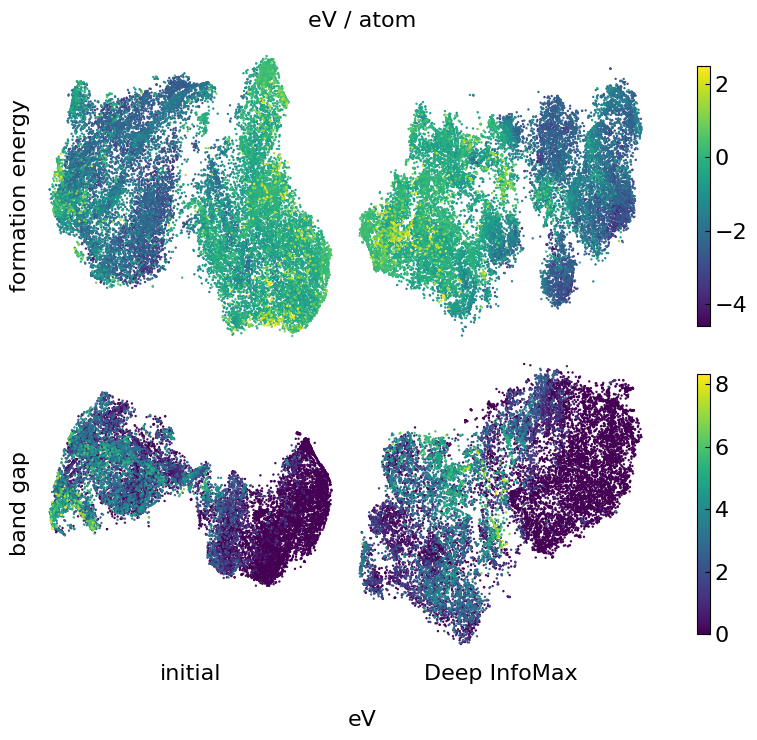

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt      
import matplotlib.colors as colors
import matplotlib.ticker as ticker
import matplotlib

plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"

font = {'size'   : 16}

matplotlib.rc('font', **font)

fig,ax = plt.subplots(2, 3, sharex=False, sharey="row",gridspec_kw={'wspace':0, 'hspace':0.0},figsize=(8.7,8),width_ratios=[4,4,0.7],height_ratios=[1,1])

ax[0][0].set_ylabel("formation energy")
ax[1][0].set_ylabel("band gap")
ax[1][0].set_xlabel("initial")
ax[1][1].set_xlabel("Deep InfoMax")

for i, df in enumerate(datasets_live):
    datasets_live[i] = df.sort_values("target",ascending=True)

# make spines (the box) invisible
plt.setp(ax[0,0].spines.values(), visible=False)
# remove ticks and labels for the left axis
ax[0,0].tick_params(left=False, labelleft=False,bottom=False,labelbottom=False)
#remove background patch (only needed for non-white background)
ax[0,0].patch.set_visible(False)
plot = ax[0][0].scatter(datasets_live[0]["0"],datasets_live[0]["1"],s=0.5,c=datasets_live[0]["target"])
#fig.colorbar(plot,ax=ax[0][0])

# make spines (the box) invisible
plt.setp(ax[1,0].spines.values(), visible=False)
# remove ticks and labels for the left axis
ax[1,0].tick_params(left=False, labelleft=False,bottom=False,labelbottom=False)
#remove background patch (only needed for non-white background)
ax[1,0].patch.set_visible(False)
plot = ax[1][0].scatter(datasets_live[1]["0"],datasets_live[1]["1"],s=0.5,c=datasets_live[1]["target"])
#fig.colorbar(plot,ax=ax[1][0])

# make spines (the box) invisible
plt.setp(ax[0,1].spines.values(), visible=False)
# remove ticks and labels for the left axis
ax[0,1].tick_params(left=False, labelleft=False,bottom=False,labelbottom=False)
#remove background patch (only needed for non-white background)
ax[0,1].patch.set_visible(False)
plot = ax[0][1].scatter(datasets_live[2]["0"],datasets_live[2]["1"],s=0.5,c=datasets_live[2]["target"])
fig.colorbar(plot,ax=ax[0][2],fraction=0.24)

# make spines (the box) invisible
plt.setp(ax[1,1].spines.values(), visible=False)
# remove ticks and labels for the left axis
ax[1,1].tick_params(left=False, labelleft=False,bottom=False,labelbottom=False)
#remove background patch (only needed for non-white background)
ax[1,1].patch.set_visible(False)
#Control draw order
plot = ax[1][1].scatter(datasets_live[3]["0"],datasets_live[3]["1"],s=0.5,c=datasets_live[3]["target"])
fig.colorbar(plot,ax=ax[1][2],fraction=0.24)

ax[0,2].axis("off")
ax[1,2].axis("off")
fig.text(0.5, 0.025, "eV", ha='center')
fig.text(0.5, 0.9, "eV / atom", ha='center')
fig.savefig("TSNE_Property.png",dpi=300)
fig.show()

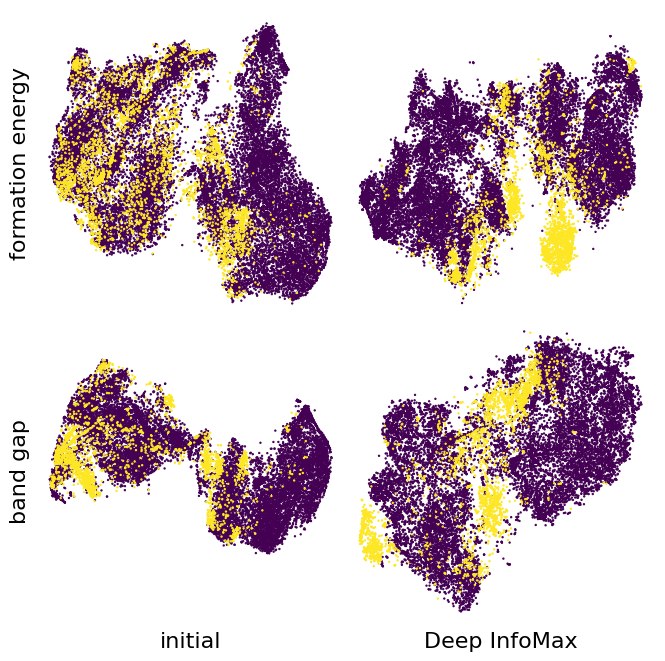

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt      
import matplotlib.colors as colors
import matplotlib.ticker as ticker
import matplotlib

def get_property(df):
    values = [i.composition.contains_element_type("halogen") and i.composition.contains_element_type("metal") for i in df["primitive"]]
    return values

plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"

font = {'size'   : 16}

matplotlib.rc('font', **font)

fig,ax = plt.subplots(2, 2, sharex=False, sharey="row",gridspec_kw={'wspace':0, 'hspace':0.0},figsize=(8,8),width_ratios=[4,4],height_ratios=[1,1])

ax[0][0].set_ylabel("formation energy")
ax[1][0].set_ylabel("band gap")
ax[1][0].set_xlabel("initial")
ax[1][1].set_xlabel("Deep InfoMax")

for i, df in enumerate(datasets_live):
    df["halMetal"] = get_property(df)
    datasets_live[i] = df.sort_values("halMetal",ascending=True)

# make spines (the box) invisible
plt.setp(ax[0,0].spines.values(), visible=False)
# remove ticks and labels for the left axis
ax[0,0].tick_params(left=False, labelleft=False,bottom=False,labelbottom=False)
#remove background patch (only needed for non-white background)
ax[0,0].patch.set_visible(False)
plot = ax[0][0].scatter(datasets_live[0]["0"],datasets_live[0]["1"],s=0.5,c=datasets_live[0]["halMetal"])
#fig.colorbar(plot,ax=ax[0][0])

# make spines (the box) invisible
plt.setp(ax[1,0].spines.values(), visible=False)
# remove ticks and labels for the left axis
ax[1,0].tick_params(left=False, labelleft=False,bottom=False,labelbottom=False)
#remove background patch (only needed for non-white background)
ax[1,0].patch.set_visible(False)
plot = ax[1][0].scatter(datasets_live[1]["0"],datasets_live[1]["1"],s=0.5,c=datasets_live[1]["halMetal"])
#fig.colorbar(plot,ax=ax[1][0])

# make spines (the box) invisible
plt.setp(ax[0,1].spines.values(), visible=False)
# remove ticks and labels for the left axis
ax[0,1].tick_params(left=False, labelleft=False,bottom=False,labelbottom=False)
#remove background patch (only needed for non-white background)
ax[0,1].patch.set_visible(False)
plot = ax[0][1].scatter(datasets_live[2]["0"],datasets_live[2]["1"],s=0.5,c=datasets_live[2]["halMetal"])
#fig.colorbar(plot,ax=ax[0][2],fraction=0.24)

# make spines (the box) invisible
plt.setp(ax[1,1].spines.values(), visible=False)
# remove ticks and labels for the left axis
ax[1,1].tick_params(left=False, labelleft=False,bottom=False,labelbottom=False)
#remove background patch (only needed for non-white background)
ax[1,1].patch.set_visible(False)
plot = ax[1][1].scatter(datasets_live[3]["0"],datasets_live[3]["1"],s=0.5,c=datasets_live[3]["halMetal"])
#fig.colorbar(plot,ax=ax[1][2],fraction=0.24)

#ax[0,2].axis("off")
#ax[1,2].axis("off")
fig.savefig("TSNE_Halogen.png",dpi=300)
fig.show()